In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"herutriana","key":"88107ea2353190c212bc946f7b23c91f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kondwani/eye-disease-dataset

100% 4.96M/4.96M [00:00<00:00, 46.5MB/s]



In [ ]:
import tensorflow as tensor
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile,os
zip_lcl = '/content/eye-disease-dataset.zip'
rzip = zipfile.ZipFile(zip_lcl, 'r')
rzip.extractall('/tmp')
rzip.close()
 
dirbase = '/tmp'

In [ ]:
os.listdir('/tmp/Eye_diseases')

['Uveitis', 'Cataracts', 'Glaucoma', 'Bulging_Eyes', 'Crossed_Eyes']

In [ ]:
dir = os.path.join(dirbase,'Eye_diseases')

In [ ]:
data_generator = ImageDataGenerator(
    shear_range=0.1,
    fill_mode='nearest',
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True)

In [53]:
generator_latih = data_generator.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=25,
    subset='training',
    class_mode='categorical')
generator_valid = data_generator.flow_from_directory(
    directory=dir,
    target_size=(180,180),
    batch_size=25,
    subset='validation',
    class_mode='categorical')

Found 383 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [47]:
model = tensor.keras.models.Sequential([
  tensor.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (180,180,3),classes=5,classifier_activation='softmax'),
  tensor.keras.layers.Flatten(),
  tensor.keras.layers.Dense(512,activation='softmax'),
  tensor.keras.layers.Dense(5,activation='softmax')
  ])

58900480/58889256 [==============================] - 1s 0us/step


In [54]:
model.compile(loss=tensor.keras.losses.MeanSquaredError(),optimizer=tensor.optimizers.Adam(),
              metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
earstop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
cekmodel = ModelCheckpoint(filepath='model.hdf5',monitor='accuracy',mode='max',verbose=1,save_best_only=True)

In [55]:
history = model.fit(
    generator_latih,
    steps_per_epoch=10,
    epochs=40,
    verbose=1,
    callbacks=[cekmodel])

Epoch 1/40
10/10 [==============================] - ETA: 0s - loss: 0.1481 - accuracy: 0.4635 
Epoch 1: accuracy did not improve from 0.46667
10/10 [==============================] - 269s 27s/step - loss: 0.1481 - accuracy: 0.4635
Epoch 2/40
10/10 [==============================] - ETA: 0s - loss: 0.1486 - accuracy: 0.4378 
Epoch 2: accuracy did not improve from 0.46667
10/10 [==============================] - 267s 26s/step - loss: 0.1486 - accuracy: 0.4378
Epoch 3/40
 6/10 [=================>............] - ETA: 1:54 - loss: 0.1477 - accuracy: 0.4467

KeyboardInterrupt: ignored

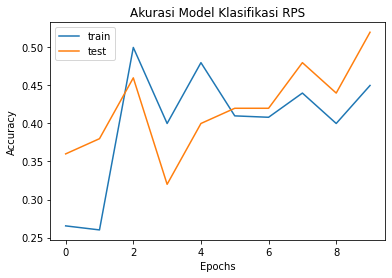

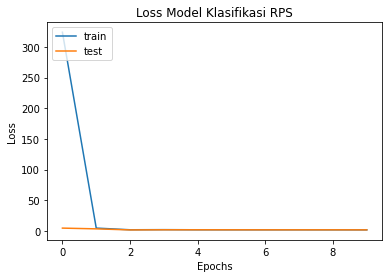

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model Klasifikasi RPS')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model Klasifikasi RPS')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pengubah = tensor.lite.TFLiteConverter.from_keras_model(model)
tflite_model = pengubah.convert()

INFO:tensorflow:Assets written to: /tmp/tmpq3q2q_et/assets


In [ ]:
with tensor.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save('model.pb') 
%cd

INFO:tensorflow:Assets written to: model.pb/assets


INFO:tensorflow:Assets written to: model.pb/assets


/root
